In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy

In [27]:
!ls

model_evaluation_utils.py
neural_models.ipynb
speeches_millercenter_preprocessed.csv
vectorization_and_classification_models.ipynb


In [28]:
text_data = pd.read_csv('../speeches_millercenter_preprocessed.csv')

In [29]:
text_data.head(2)

,Transcript,Summary,President,Source,Date,URL,Word Count,Affiliation,Label
0,34th time speak oval office year soon time wan...,"In this broadcast from the Oval Office, Presid...",Ronald Reagan,National Archives,"January 11, 1989",https://millercenter.org/the-presidency/presid...,3289,Republican,0
1,thank warm welcome governor baliles congress...,NaN,Ronald Reagan,NaN,"December 16, 1988",https://millercenter.org/the-presidency/presid...,7127,Republican,0


In [4]:
# train test split
from sklearn.model_selection import train_test_split
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(text_data['Transcript'],
                                         np.array(text_data['Label']),
                                         np.array(text_data['Affiliation']),
                                         test_size=0.33, random_state=42)
train_corpus.shape, test_corpus.shape

((261,), (130,))

In [14]:
whole_corpus =  ' '.join(text_data['Transcript'].to_list())

In [17]:
whole_corpus = list(set([word for word in whole_corpus.split(' ')]))

In [30]:
whole_corpus[:5]

['', 'seemingly', 'throwback', 'partsinevelo', 'kidnap']

In [25]:
nlp = spacy.load('en_vectors_web_lg')
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [31]:
unique_words = list(set([word for sublist in [doc.split() for doc in whole_corpus] for word in sublist]))
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])

In [35]:
import matplotlib.pyplot as plt

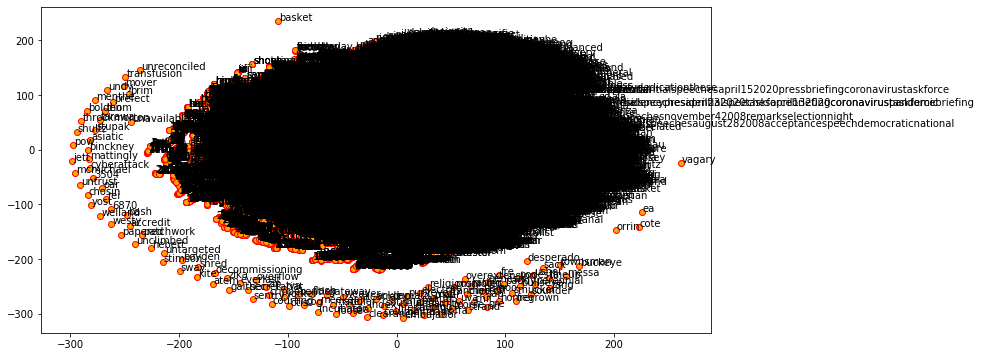

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors="r")
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [41]:
from sklearn.cluster import KMeans
corpus_df = pd.DataFrame({'Document': text_data['Transcript'], 'Category': text_data['Affiliation']})
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in whole_corpus])
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,34th time speak oval office year soon time wan...,Republican,0
1,thank warm welcome governor baliles congress...,Republican,1
2,thank thank seat live today remember know free...,Republican,1
3,mr president mr general secretary distinguishe...,Republican,0
4,madam chairman delegate convention fellow citi...,Republican,1
...,...,...,...
23725,NaN,NaN,0
23726,NaN,NaN,1
23727,NaN,NaN,0
23728,NaN,NaN,0


In [ ]:
## How would I pass the vectors to the classification models?
# https://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

